In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
y = df['Sales']
x = df[['TV', 'Radio','Newspaper']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression().fit(x, y)

In [ ]:
#value of b_0
print("The value of intercept is : ",model.intercept_)
#coefficient of every column i.e. TV(b_1), Radio(b_2), Newspaper(b_3)
columns_name = x.columns
model_coefficients = model.coef_
coefficients_df = pd.DataFrame(data = model_coefficients,
index = columns_name,
columns = ['Coefficient value'])

print("\n",coefficients_df)

The value of intercept is :  2.938889369459412

            Coefficient value
TV                  0.045765
Radio               0.188530
Newspaper          -0.001037


In [ ]:
y_predict = model.predict(x_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict}, index=None)
print(results)

     Actual  Predicted
95     16.9  16.314921
15     22.4  20.819300
30     21.4  21.633934
158     7.3  10.384199
128    24.7  22.255492
115    12.6  12.919689
69     22.3  21.108912
170     8.4   7.394980
174    11.5  13.744357
45     14.9  15.161523
66      9.5   9.016032
182     8.7   6.554670
165    11.9  14.223721
78      5.3   8.813314
186    10.3   9.691373
177    11.7  12.162046
56      5.5   8.527713
152    16.6  16.360000
82     11.3  10.178408
68     18.9  18.976579
124    19.7  19.454413
16     12.5  12.823657
148    10.9  12.263359
93     22.2  21.227574
65      9.3   7.849045
60      8.1   5.742156
84     21.7  20.781365
67     13.4  12.037007
125    10.6   9.127350
132     5.7   8.449150
9      10.6  12.550849
18     11.3   9.951682
55     23.7  21.292611
75      8.7  11.858322
150    16.1  18.367205
104    20.7  20.301109
135    11.6  14.001414
137    20.8  20.851252
164    11.9  11.068295
76      6.9   4.477589


In [ ]:
mse = mean_squared_error(y_test,y_predict)
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 3.04


In [ ]:
R_2 = r2_score(y_test, y_predict)
print(f'R2: {R_2:.2f}')
print("Accuracy",(R_2)*100)

R2: 0.90
Accuracy 90.35619145344694


[Text(0.5, 1.0, 'Advertisement v/s Sales')]

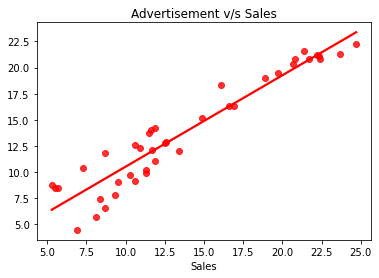

In [ ]:
sns.regplot(x=y_test,y=y_predict,ci=None,color ='red').set(title='Advertisement v/s Sales')